In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [35]:
data = pd.read_csv("/gdrive/My Drive/CS229 final project/ziyad/T1.csv")

In [36]:
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [37]:
# changing datetime to correct format
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [38]:
data = data.dropna()

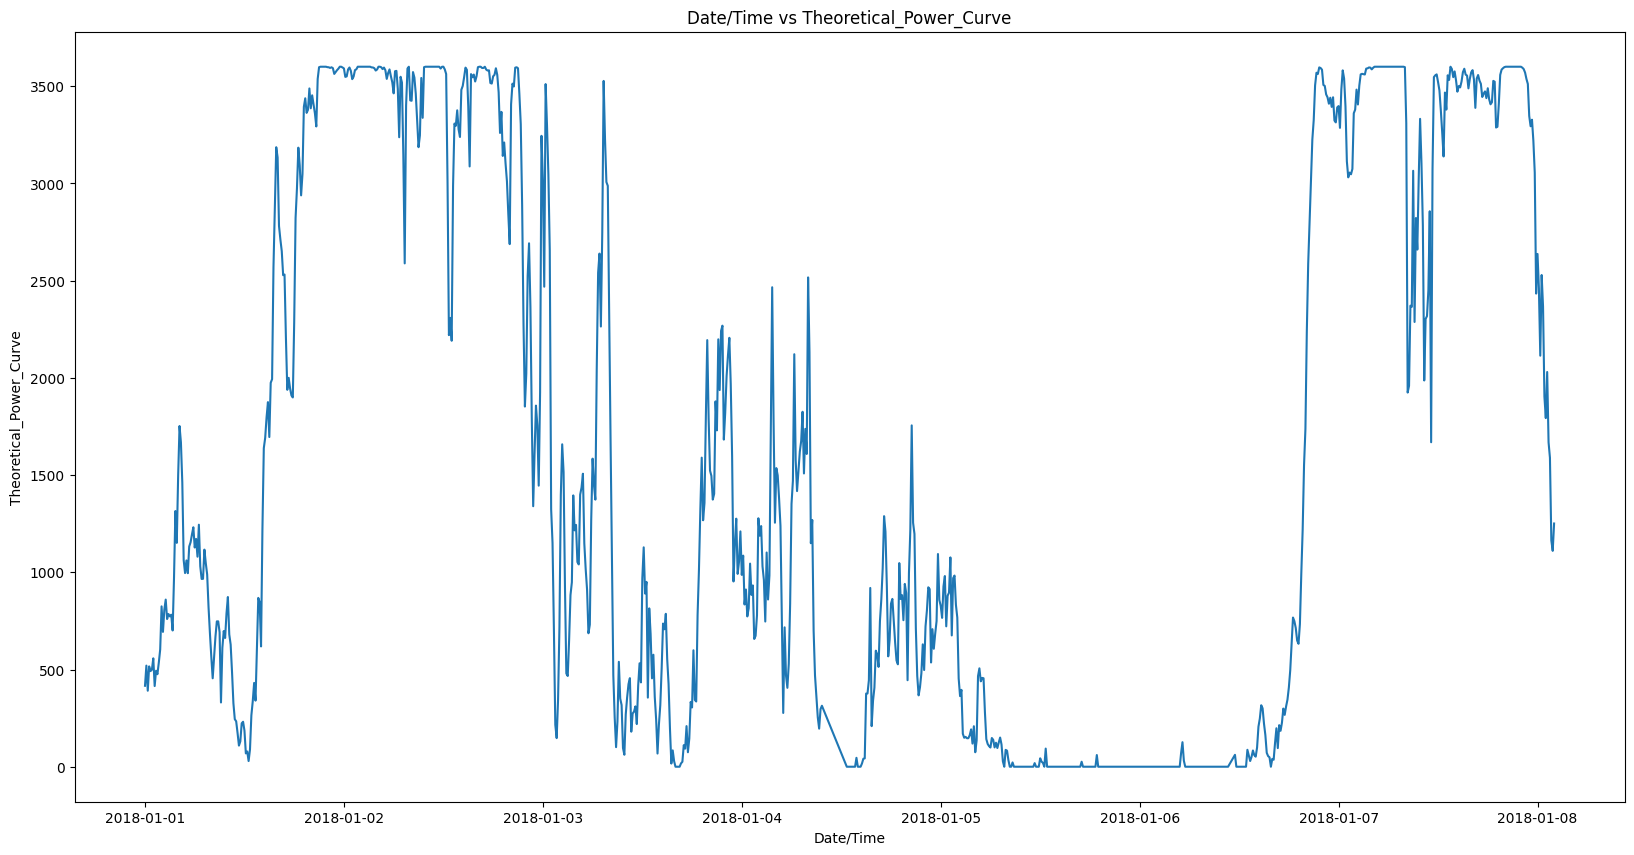

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][0:1000])

# Set title and labels for axes
ax.set(xlabel="Date/Time",
       ylabel="Theoretical_Power_Curve",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [40]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv

from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras.backend as K

from math import sqrt
import datetime

In [41]:
df = data.copy()
cols = ["Date/Time", "LV ActivePower (kW)",	"Wind Speed (m/s)",
        "Wind Direction (°)", "Theoretical_Power_Curve (KWh)"]
df = df[cols]
df = df.set_index('Date/Time')
df

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Theoretical_Power_Curve (KWh)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,259.994904,416.328908
2018-01-01 00:10:00,453.769196,5.672167,268.641113,519.917511
2018-01-01 00:20:00,306.376587,5.216037,272.564789,390.900016
2018-01-01 00:30:00,419.645905,5.659674,271.258087,516.127569
2018-01-01 00:40:00,380.650696,5.577941,265.674286,491.702972
...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,80.502724,3397.190793
2018-12-31 23:20:00,1684.353027,7.332648,84.062599,1173.055771
2018-12-31 23:30:00,2201.106934,8.435358,84.742500,1788.284755


In [42]:
neurons = 200
num_predict = 1000
batch_size = 100
epochs = 50
dropout = .05

In [43]:
# all features
train, test = df[:-num_predict].values, df[-num_predict:].values
X, y = train[:, 0:-1], train[:, -1]
X = X.reshape(X.shape[0], 1, X.shape[1])

In [44]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [45]:
model = Sequential()
model.add(LSTM(units=neurons, dropout=dropout, activation='relu', batch_input_shape=(batch_size, X.shape[1], X.shape[2])))
model.add(Dense(1))  # Output layer for regression tasks
model.compile(loss=root_mean_squared_error, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (100, 200)                163200    
                                                                 
 dense_2 (Dense)             (100, 1)                  201       
                                                                 
Total params: 163401 (638.29 KB)
Trainable params: 163401 (638.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=True)

Epoch 1/50
496/496 [==============================] - 3s 5ms/step - loss: 651.0633 - accuracy: 0.0031
Epoch 2/50
496/496 [==============================] - 2s 5ms/step - loss: 362.4702 - accuracy: 0.0290
Epoch 3/50
496/496 [==============================] - 3s 7ms/step - loss: 291.3081 - accuracy: 0.0379
Epoch 4/50
496/496 [==============================] - 2s 5ms/step - loss: 257.7177 - accuracy: 0.0462
Epoch 5/50
496/496 [==============================] - 2s 5ms/step - loss: 244.0300 - accuracy: 0.0505
Epoch 6/50
496/496 [==============================] - 2s 5ms/step - loss: 235.2760 - accuracy: 0.0618
Epoch 7/50
496/496 [==============================] - 2s 5ms/step - loss: 238.5853 - accuracy: 0.0552
Epoch 8/50
496/496 [==============================] - 3s 6ms/step - loss: 230.1185 - accuracy: 0.0540
Epoch 9/50
496/496 [==============================] - 3s 5ms/step - loss: 224.3834 - accuracy: 0.0594
Epoch 10/50
496/496 [==============================] - 2s 5ms/step - loss: 222.206

In [47]:
X_test, y_test = test[:, 0:-1], test[:, -1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [48]:
predictions = model.predict(X_test, batch_size=batch_size)

10/10 [==============================] - 0s 2ms/step


In [49]:
predicted = []
for i in range(len(predictions[-num_predict:])):
    # print(predictions[-500:][i][0])
    predicted.append(predictions[-num_predict:][i][0])
predicted = np.array(predicted)

pred = []
expt = []
expected = y_test
for i in range(len(expected)):
    if expected[i] == 0:
        continue
    expt.append(expected[i])
    pred.append(predicted[i])


In [50]:
print("Mean Absolute Percent Error: ", np.mean(np.abs(np.array(expt) - np.array(pred) / np.array(expt))))

Mean Absolute Percent Error:  995.9917837817321


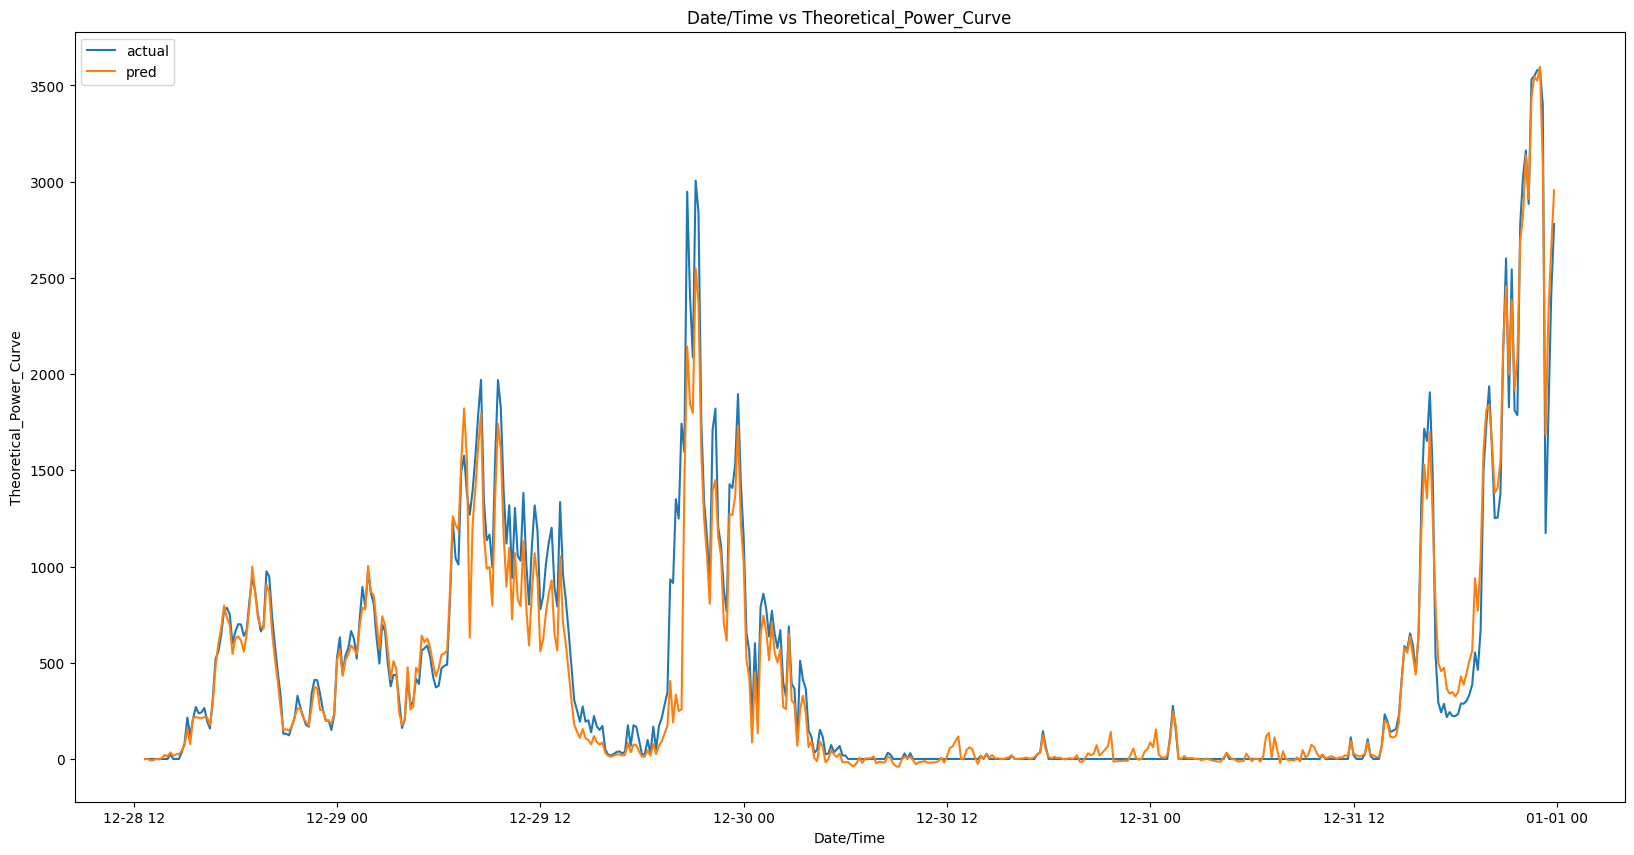

In [51]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][-500:],
        data['Theoretical_Power_Curve (KWh)'][-500:],
        label="actual")
ax.plot(data['Date/Time'][-500:],
        predictions[-500:], label="pred")

# Set title and labels for axes
ax.set(xlabel="Date/Time",
       ylabel="Theoretical_Power_Curve",
       title="Date/Time vs Theoretical_Power_Curve")
ax.legend()

plt.show()

In [52]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 199.3511 - accuracy: 0.1410


[199.35113525390625, 0.14100000262260437]

[Text(0.5, 0, 'Epochs'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Accuracy vs Epoch')]

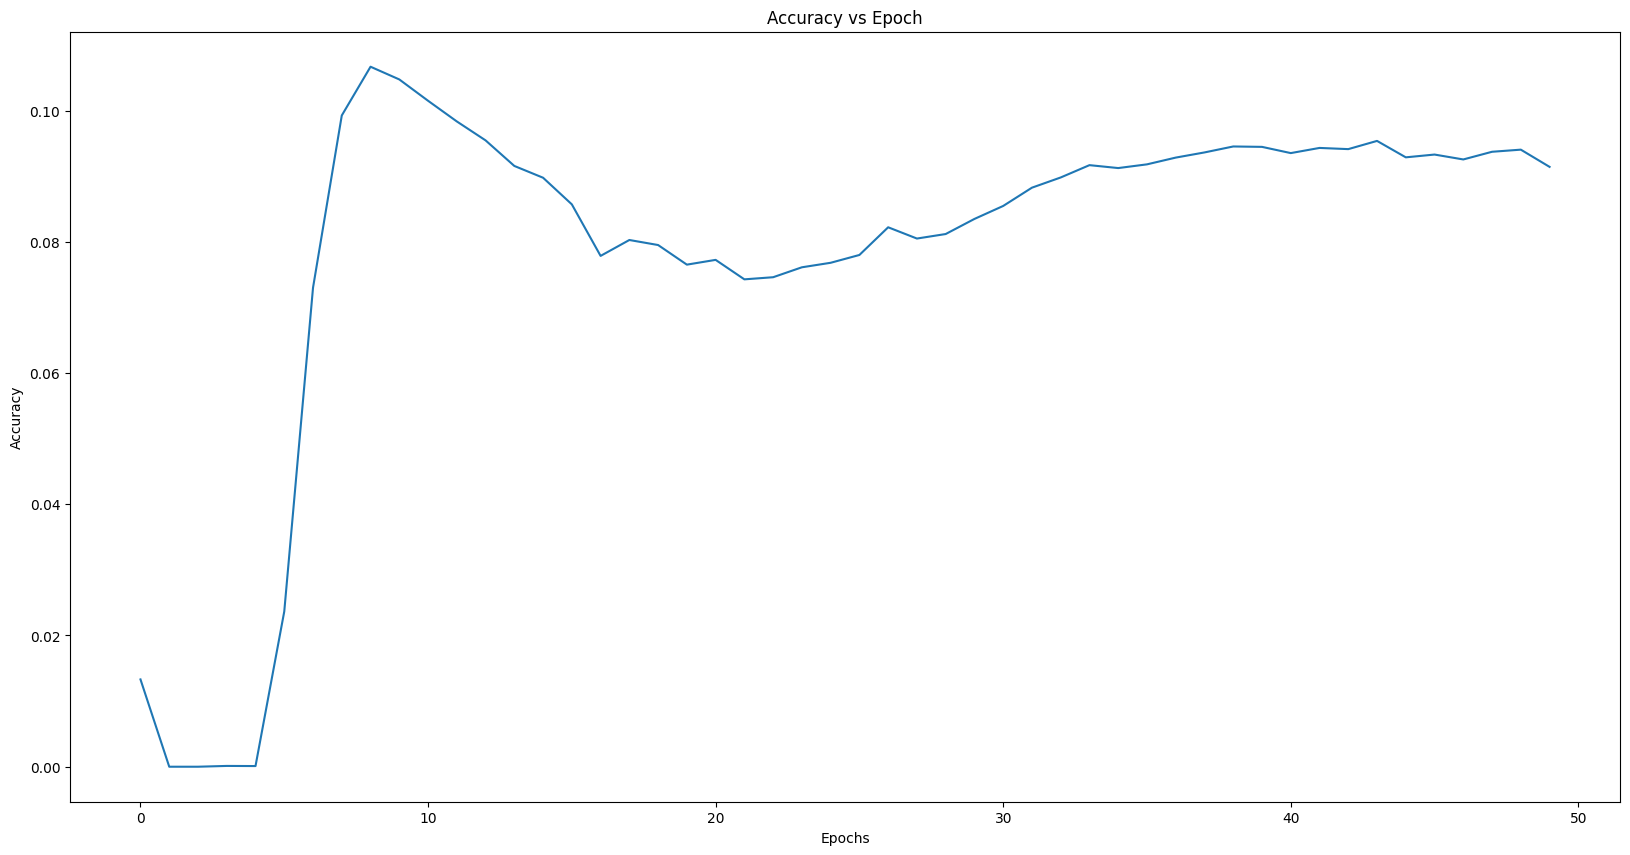

In [65]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(history.history['accuracy'])
ax.set(xlabel="Epochs",
       ylabel="Accuracy",
       title="Accuracy vs Epoch")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss'), Text(0.5, 1.0, 'Loss vs Epoch')]

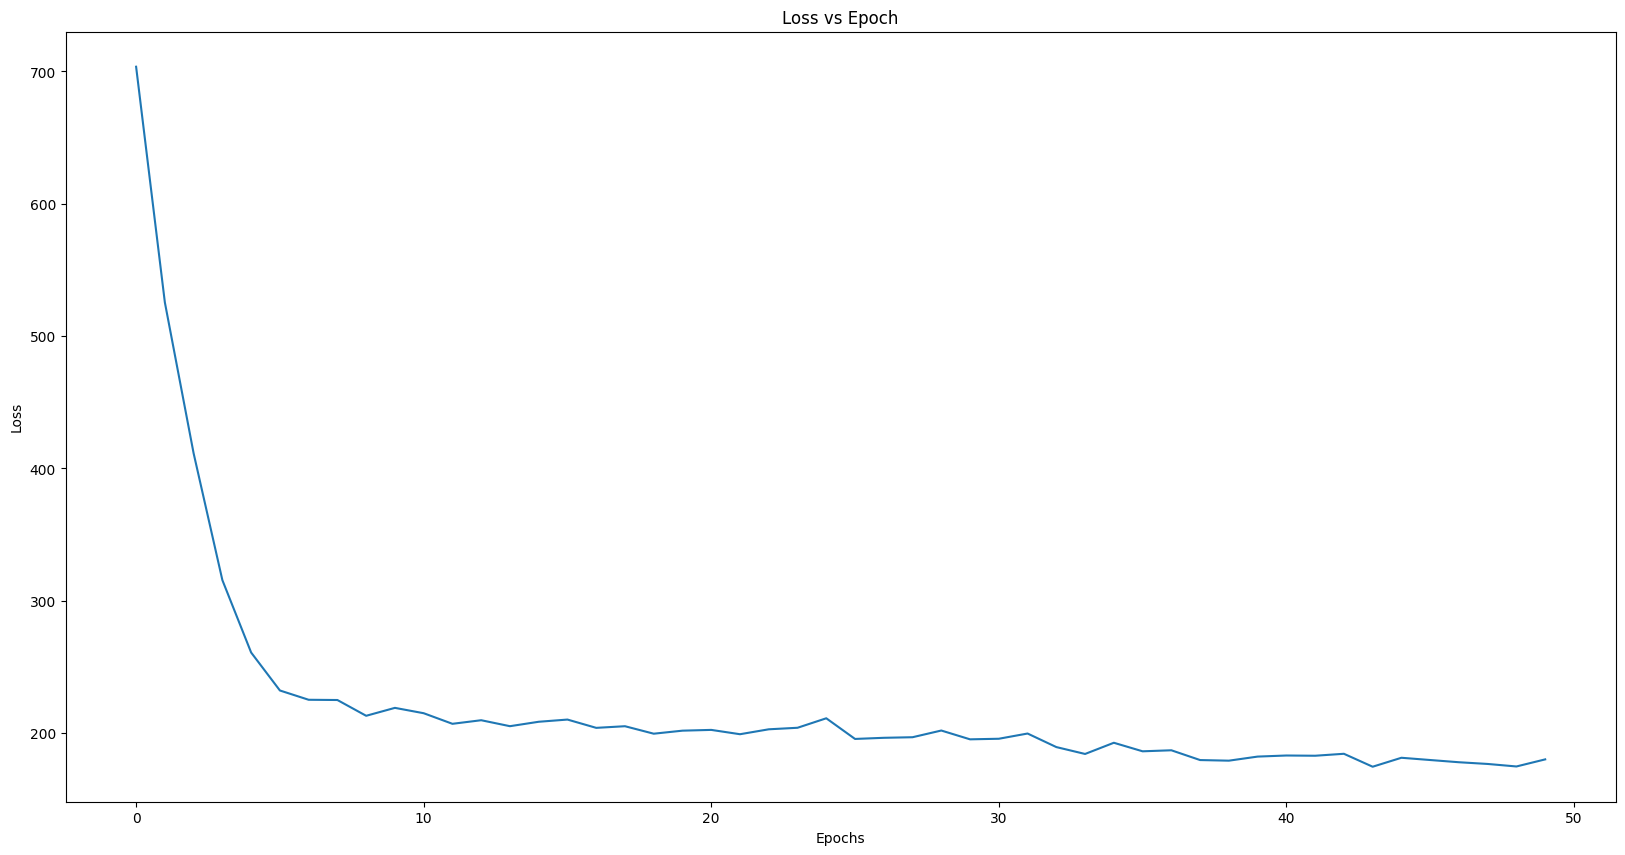

In [66]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(history.history['loss'])
ax.set(xlabel="Epochs",
       ylabel="Loss",
       title="Loss vs Epoch")

## Without Wind Direction


In [67]:
# all features
train, test = df[:-num_predict].values, df[-num_predict:].values
X, y = train[:, 0:-2], train[:, -1]
X = X.reshape(X.shape[0], 1, X.shape[1])

In [68]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [69]:
model = Sequential()
model.add(LSTM(units=neurons, dropout=dropout, activation='relu', batch_input_shape=(batch_size, X.shape[1], X.shape[2])))
model.add(Dense(1))  # Output layer for regression tasks
model.compile(loss=root_mean_squared_error, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (100, 200)                162400    
                                                                 
 dense_4 (Dense)             (100, 1)                  201       
                                                                 
Total params: 162601 (635.16 KB)
Trainable params: 162601 (635.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=True)

Epoch 1/50
496/496 [==============================] - 3s 5ms/step - loss: 701.1371 - accuracy: 0.0119
Epoch 2/50
496/496 [==============================] - 2s 5ms/step - loss: 513.9380 - accuracy: 0.0000e+00
Epoch 3/50
496/496 [==============================] - 3s 7ms/step - loss: 404.3901 - accuracy: 1.0095e-04
Epoch 4/50
496/496 [==============================] - 2s 5ms/step - loss: 301.5093 - accuracy: 1.2114e-04
Epoch 5/50
496/496 [==============================] - 2s 5ms/step - loss: 251.2045 - accuracy: 1.2114e-04
Epoch 6/50
496/496 [==============================] - 2s 5ms/step - loss: 232.1026 - accuracy: 0.0073
Epoch 7/50
496/496 [==============================] - 2s 5ms/step - loss: 225.1431 - accuracy: 0.0595
Epoch 8/50
496/496 [==============================] - 3s 7ms/step - loss: 220.2101 - accuracy: 0.0960
Epoch 9/50
496/496 [==============================] - 2s 5ms/step - loss: 234.5172 - accuracy: 0.1044
Epoch 10/50
496/496 [==============================] - 2s 5ms/step

In [59]:
X_test, y_test = test[:, 0:-2], test[:, -1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [60]:
predictions = model.predict(X_test, batch_size=batch_size)

10/10 [==============================] - 0s 2ms/step


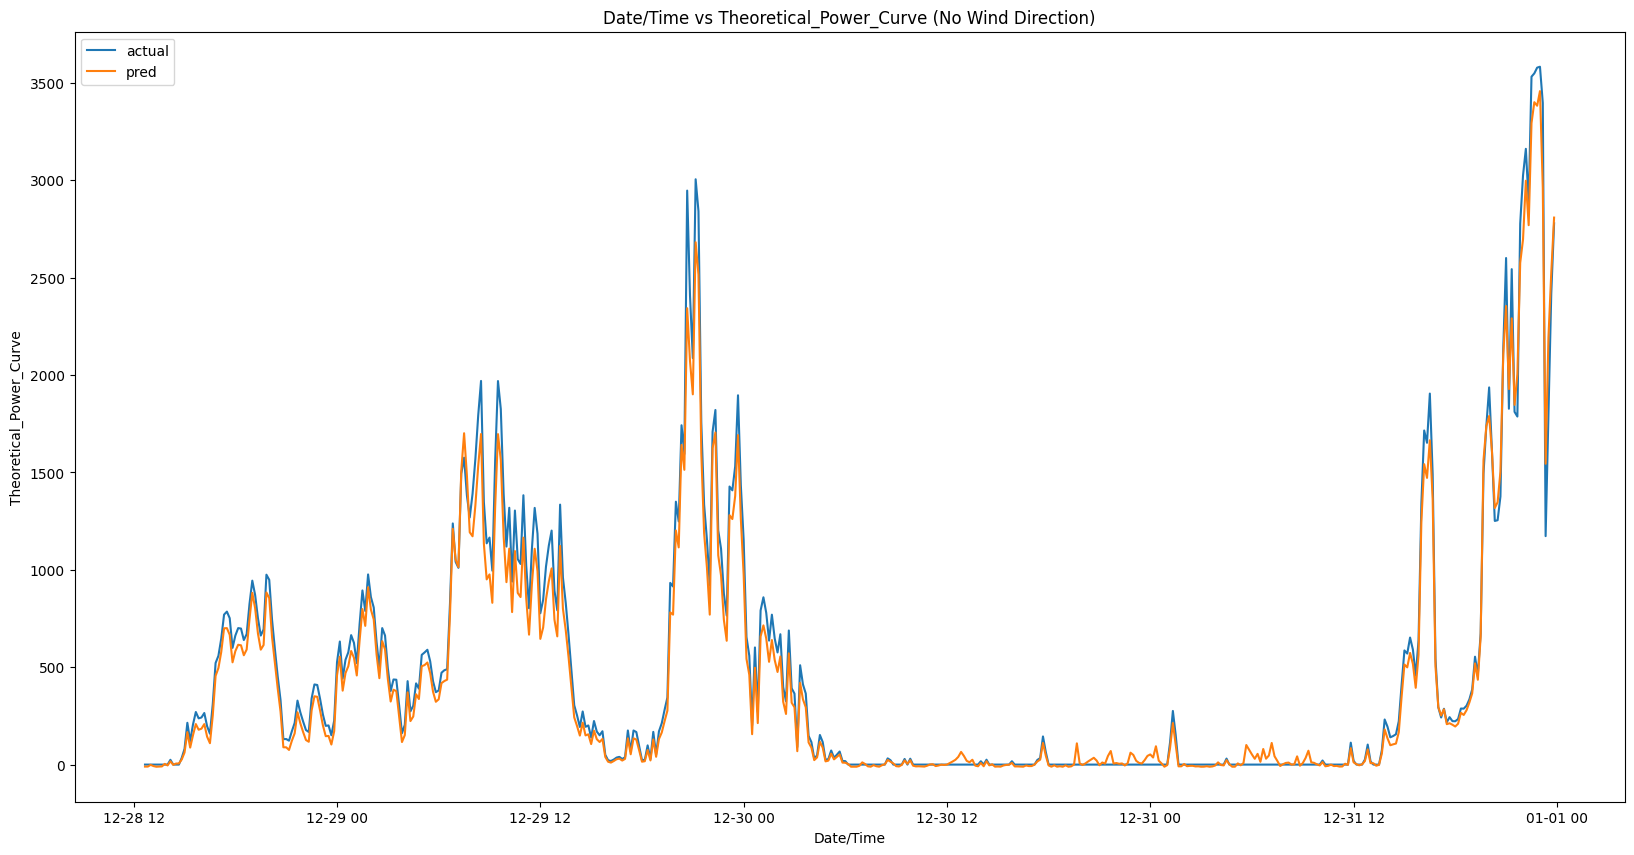

In [61]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][-500:],
        data['Theoretical_Power_Curve (KWh)'][-500:],
        label="actual")
ax.plot(data['Date/Time'][-500:],
        predictions[-500:], label="pred")

# Set title and labels for axes
ax.set(xlabel="Date/Time",
       ylabel="Theoretical_Power_Curve",
       title="Date/Time vs Theoretical_Power_Curve (No Wind Direction)")
ax.legend()

plt.show()

In [62]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 145.9433 - accuracy: 0.1940


[145.94329833984375, 0.1940000057220459]

In [63]:
predicted = []
for i in range(len(predictions[-num_predict:])):
    # print(predictions[-500:][i][0])
    predicted.append(predictions[-num_predict:][i][0])
predicted = np.array(predicted)

pred = []
expt = []
expected = y_test
for i in range(len(expected)):
    if expected[i] == 0:
        continue
    expt.append(expected[i])
    pred.append(predicted[i])


In [64]:
print("Mean Absolute Percent Error: ", np.mean(np.abs(np.array(expt) - np.array(pred) / np.array(expt))))

Mean Absolute Percent Error:  995.9395507205458
